In [6]:
import pandas as pd

In [58]:
df = pd.read_csv('data/Fish.csv')

In [59]:
cond = df['Species'] == 'Perch'
length_p = df.loc[cond, ['Length2']]
weight_p = df.loc[cond, ['Weight']]

length_p.head()

,Length2
72,8.4
73,13.7
74,15.0
75,16.2
76,17.4


In [60]:
from sklearn.model_selection import train_test_split

In [68]:
train_input, test_input, train_target, test_target = train_test_split(
    length_p, weight_p, random_state = 100
)

In [69]:
train_input.head()

,Length2
100,25.6
109,32.8
114,37.0
110,34.5
123,42.0


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(train_input, train_target)

LinearRegression()

In [73]:
lr.score(test_input, test_target)

0.8854159312228587

In [74]:
lr.predict([[100]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3117.99371211]])

In [88]:
a = lr.coef_[0][0]

In [89]:
b = lr.intercept_[0]

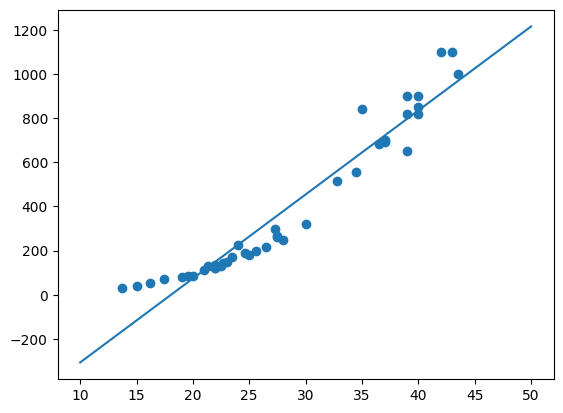

In [91]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot([10, 50], [10*a + b,50*a +b])
plt.show()

## 다항회귀

In [92]:
length_p.head()

,Length2
72,8.4
73,13.7
74,15.0
75,16.2
76,17.4


In [93]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2

In [94]:
train_input.head()

,Length2,Length2_poly
100,25.6,655.36
109,32.8,1075.84
114,37.0,1369.00
110,34.5,1190.25
123,42.0,1764.00


In [96]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [97]:
lr.coef_ #기울기 (length2, length2_poly)

array([[-26.99656509,   1.10288319]])

In [98]:
lr.intercept_ #절편

array([190.60650828])

In [99]:
lr.predict([[60, 60**2]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2541.19208279]])

In [100]:
lr.score(test_input, test_target)

0.9728102367657678

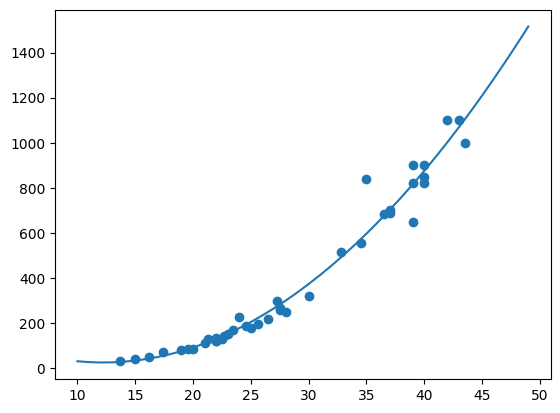

In [102]:
import matplotlib.pyplot as plt
import numpy as np

point = np.arange(10, 50)

plt.scatter(train_input['Length2'], train_target['Weight'])
#plt.plot([10, 50], [10*a + b,50*a +b])

plt.plot(point, 1.10288319 * point ** 2 + -26.99656509 * point + 190.6065)

plt.show()